**Tracking Unique Insect Species in the City of Melbourne**

Authored by: Rohang Shah
Duration: 90 mins
Level: Intermediate
Pre-requisite Skills: Python, Data Analysis, Geospatial Analysis


In the context of urban biodiversity, tracking the presence and distribution of unique insect species can significantly aid in conservation efforts. This use case focuses on identifying and monitoring areas within the City of Melbourne where certain insect species are found uniquely, compared to other areas. By analyzing the insect records collected from the Little Things that Run the City Project and subsequent Melbourne BioBlitz events, the City of Melbourne can pinpoint locations where rare or unique insect species are present. This enables the city to focus conservation efforts on these critical areas to protect and preserve these species and their habitats.

**What this Use Case Will Teach You**
At the end of this use case, you will:

*   Learn how to access and manipulate City of Melbourne Open Data.
*   Develop skills in geospatial data analysis.
*   Gain experience in identifying patterns and anomalies in biodiversity data.
*   Understand how to use data analysis to inform conservation strategies.


**Introduction or Background**
Urbanization poses a significant threat to biodiversity. The City of Melbourne, through projects like the Little Things that Run the City and Melbourne BioBlitz events, has collected valuable data on insect species within the city. This data can be leveraged to identify and protect unique insect species and their habitats. By focusing conservation efforts on areas where these species are found, the City of Melbourne can enhance its biodiversity and ensure the sustainability of its ecosystems.


**User Story**
Title: Protecting Melbourne's Unique Insect Species
As a conservation biologist working with the City of Melbourne, I want to identify and monitor areas within the city where certain insect species are uniquely found so that I can focus conservation efforts on these critical habitats to protect and preserve these species and their ecosystems.

**Scenario**
The City of Melbourne has been collecting insect data through the "Little Things that Run the City" project and the Melbourne BioBlitz events. This data includes observations of various insect species across different locations in the city. As a conservation biologist, my goal is to analyze this data to pinpoint areas with unique insect species that are not found elsewhere. By identifying these critical habitats, the city can prioritize conservation efforts, allocate resources effectively, and develop strategies to protect these unique species from urban development and other threats.







In [55]:
import requests
import pandas as pd
from io import StringIO
from tabulate import tabulate

def collect_data(dataset_id, apikey=""):
    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    format = 'csv'
    suffix = 'exports/csv?delimiter=%3B&list_separator=%2C&quote_all=false&with_bom=true'

    url = f'{base_url}{dataset_id}/{suffix}'
    params = {
        'select': '*',
        'limit': -1,
        'lang': 'en',
        'timezone': 'UTC',
        'api_key': apikey
    }

    response = requests.get(url, params=params)
    response.raise_for_status()

    # Load the CSV data into a DataFrame
    df = pd.read_csv(StringIO(response.text), delimiter=';')
    return df

# List of dataset IDs
dataset_ids = [
    'insect-records-in-the-city-of-melbourne-from-little-things-that-run-the-city'
]

API_KEY = ""  # Add your API key here if required

# Loop through each dataset ID and process the data
for dataset_id in dataset_ids:
    print(f"Processing dataset: {dataset_id}")

    # Fetch the data
    df = collect_data(dataset_id, apikey=API_KEY)

    # Display data summary
    print("\nDataFrame Info:")
    print(tabulate(df.info(), headers='keys', tablefmt='psql'))

    print("\nDataFrame Description:")
    print(tabulate(df.describe(include='all'), headers='keys', tablefmt='psql'))

    print("\nFirst 5 Rows of DataFrame:")
    print(tabulate(df.head(), headers='keys', tablefmt='psql'))
    print("\n" + "="*50 + "\n")  # Separator between datasets


Processing dataset: insect-records-in-the-city-of-melbourne-from-little-things-that-run-the-city

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   taxa                  1295 non-null   object 
 1   kingdom               1295 non-null   object 
 2   phylum                1295 non-null   object 
 3   class                 1295 non-null   object 
 4   order                 1295 non-null   object 
 5   family                1290 non-null   object 
 6   genus                 589 non-null    object 
 7   species               264 non-null    object 
 8   identification_notes  1031 non-null   object 
 9   location              1295 non-null   object 
 10  sighting_date         0 non-null      float64
dtypes: float64(1), object(10)
memory usage: 111.4+ KB


DataFrame Description:
+--------+--------+-----------+-----

Displaying the records in the dataset

In [56]:

num_records = df.shape[0]
print(f"Number of records in the dataset: {num_records}")


Number of records in the dataset: 1295


Inspecting the column names

In [57]:

print("Column Names:")
print(df.columns)


Column Names:
Index(['taxa', 'kingdom', 'phylum', 'class', 'order', 'family', 'genus',
       'species', 'identification_notes', 'location', 'sighting_date'],
      dtype='object')


Data cleaning

In [58]:

# Define a function to extract latitude and longitude from 'location' column
def extract_coordinates(location):
    try:
        # Assuming the location is in the format "(lat, lon)"
        lat, lon = location.strip('()').split(',')
        return float(lat), float(lon)
    except Exception as e:
        return None, None

# Apply the function to create 'latitude' and 'longitude' columns
df['latitude'], df['longitude'] = zip(*df['location'].apply(extract_coordinates))


df_cleaned = df.dropna(subset=['latitude', 'longitude'])


df_cleaned = df_cleaned.drop_duplicates()

# Display cleaned DataFrame information
print("\nCleaned DataFrame Info:")
print(df_cleaned.info())


Cleaned DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   taxa                  0 non-null      object 
 1   kingdom               0 non-null      object 
 2   phylum                0 non-null      object 
 3   class                 0 non-null      object 
 4   order                 0 non-null      object 
 5   family                0 non-null      object 
 6   genus                 0 non-null      object 
 7   species               0 non-null      object 
 8   identification_notes  0 non-null      object 
 9   location              0 non-null      object 
 10  sighting_date         0 non-null      float64
 11  latitude              0 non-null      object 
 12  longitude             0 non-null      object 
dtypes: float64(1), object(12)
memory usage: 0.0+ bytes
None


Data Analysis - Identifying unique species

In [59]:
# Identify unique insect species
unique_species = df_cleaned['species'].unique()

# Display number of unique species
num_unique_species = len(unique_species)
print(f"Number of unique insect species: {num_unique_species}")

# Display unique species names
print("Unique insect species names:")
print(unique_species)


Number of unique insect species: 0
Unique insect species names:
[]


Spatial distribution

In [60]:
import geopandas as gpd

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df_cleaned, geometry=gpd.points_from_xy(df_cleaned['longitude'], df_cleaned['latitude']))

# Display GeoDataFrame information
print("\nGeoDataFrame Info:")
print(gdf.info())

# Display first few rows of GeoDataFrame
print("\nFirst 5 Rows of GeoDataFrame:")
print(gdf.head())



GeoDataFrame Info:
<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 0 entries
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   taxa                  0 non-null      object  
 1   kingdom               0 non-null      object  
 2   phylum                0 non-null      object  
 3   class                 0 non-null      object  
 4   order                 0 non-null      object  
 5   family                0 non-null      object  
 6   genus                 0 non-null      object  
 7   species               0 non-null      object  
 8   identification_notes  0 non-null      object  
 9   location              0 non-null      object  
 10  sighting_date         0 non-null      float64 
 11  latitude              0 non-null      object  
 12  longitude             0 non-null      object  
 13  geometry              0 non-null      geometry
dtypes: float64(1), geometry(1), object(12)
memory u

In [61]:
import requests
import pandas as pd
from io import StringIO
from tabulate import tabulate  # Import tabulate for pretty tables

def collect_data(dataset_id, apikey=""):
    """
    Collect data from the Melbourne open data platform using the specified dataset ID.
    Parameters:
    dataset_id (str): The ID of the dataset to retrieve.
    apikey (str): The API key for authentication (default is an empty string).

    Returns:
    pd.DataFrame: The dataset in a Pandas DataFrame.
    """
    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    format = 'csv'
    suffix = 'exports/csv?delimiter=%3B&list_separator=%2C&quote_all=false&with_bom=true'

    url = f'{base_url}{dataset_id}/{suffix}'
    params = {
        'select': '*',
        'limit': -1,  # all records
        'lang': 'en',
        'timezone': 'UTC',
        'api_key': apikey  # Provided API key, if any
    }

    response = requests.get(url, params=params)
    response.raise_for_status()  # Raise an exception for HTTP errors

    # Load the CSV data into a DataFrame
    df = pd.read_csv(StringIO(response.text), delimiter=';')
    return df

# Dataset ID
DATASET_ID = 'bioblitz-2016'

# Hide API key (use an environment variable or pass it directly when calling the function)
API_KEY = ""  # Ensure this is set to the correct API key when used in a secure environment

# Fetch data
df = collect_data(DATASET_ID, apikey=API_KEY)

# Display data summary
print("DataFrame Info:")
print(tabulate(df.info(), headers='keys', tablefmt='psql'))  # Display DataFrame information in table format

print("\nDataFrame Description:")
print(tabulate(df.describe(include='all'), headers='keys', tablefmt='psql'))  # Display descriptive statistics in table format

print("\nFirst 5 Rows of DataFrame:")
print(tabulate(df.head(), headers='keys', tablefmt='psql'))  # Display the first few rows of the DataFrame in table format


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   taxa                  1353 non-null   object 
 1   kingdom               1353 non-null   object 
 2   phylum                1322 non-null   object 
 3   class                 1314 non-null   object 
 4   order                 1177 non-null   object 
 5   family                1139 non-null   object 
 6   genus                 953 non-null    object 
 7   species               846 non-null    object 
 8   common_name           802 non-null    object 
 9   identification_notes  588 non-null    object 
 10  data_resource_name    1356 non-null   object 
 11  sighting_date         1350 non-null   object 
 12  latitude              1356 non-null   float64
 13  longitude             1353 non-null   float64
 14  location              0 non-null      float64
 15  geopo

Map visualization using folium

In [63]:
import geopandas as gpd
import folium
from folium.plugins import HeatMap
from sklearn.cluster import DBSCAN

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['longitude'], df['latitude']))

# Initialize a map centered around Melbourne
m = folium.Map(location=[-37.8136, 144.9631], zoom_start=12)

# Add markers for each insect observation
for _, row in gdf.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['species']).add_to(m)

# Display the map
m.save('insect_distribution_map.html')

# Perform DBSCAN clustering
coords = gdf[['latitude', 'longitude']].values
db = DBSCAN(eps=0.01, min_samples=10).fit(coords)
gdf['cluster'] = db.labels_

# Visualize clusters
m = folium.Map(location=[-37.8136, 144.9631], zoom_start=12)
for cluster in gdf['cluster'].unique():
    cluster_data = gdf[gdf['cluster'] == cluster]
    for _, row in cluster_data.iterrows():
        folium.Marker([row['latitude'], row['longitude']], popup=row['species']).add_to(m)
m.save('insect_clusters_map.html')

m


Time series analysis

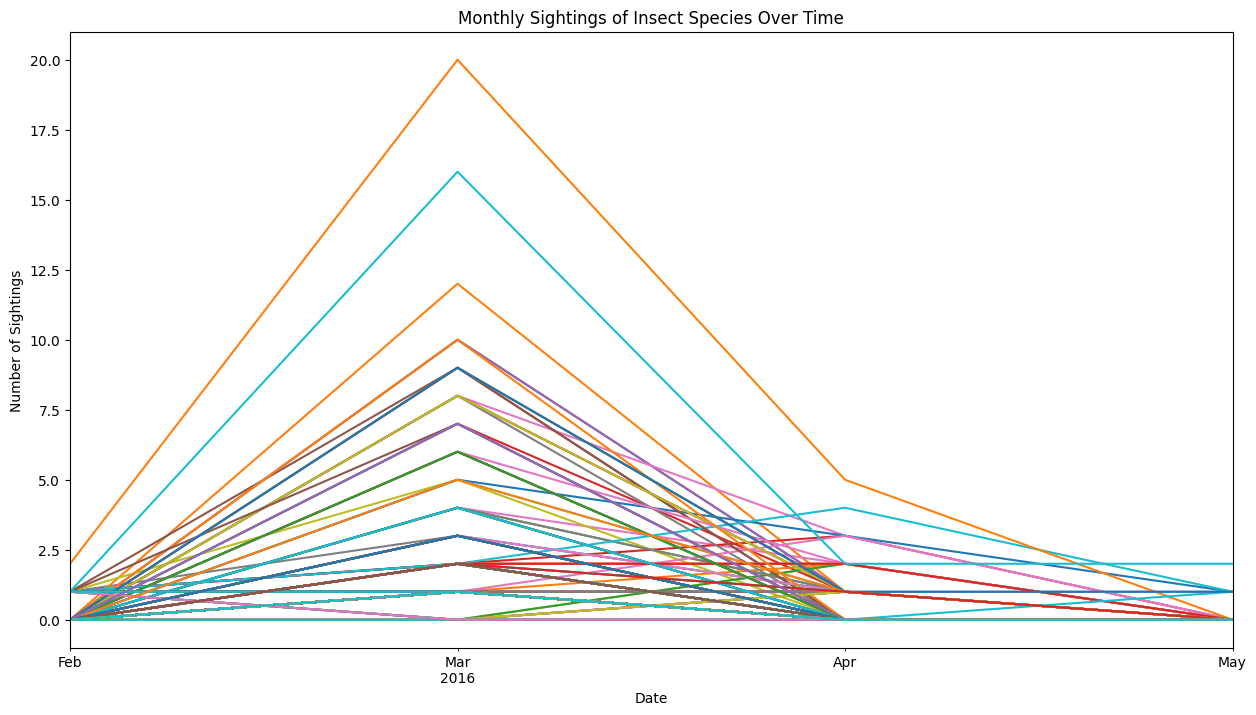

In [62]:
import matplotlib.pyplot as plt


df['sighting_date'] = pd.to_datetime(df['sighting_date'], errors='coerce')
df = df.dropna(subset=['sighting_date'])

# Group by date and species, and count the number of sightings
time_series = df.groupby([df['sighting_date'].dt.to_period('M'), 'species']).size().unstack().fillna(0)

# Plot time series for selected species
time_series.plot(figsize=(15, 8), legend=False)
plt.title('Monthly Sightings of Insect Species Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Sightings')
plt.show()


In [64]:
import requests
import pandas as pd
from io import StringIO
from tabulate import tabulate

def collect_data(dataset_id, apikey=""):
    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    format = 'csv'
    suffix = 'exports/csv?delimiter=%3B&list_separator=%2C&quote_all=false&with_bom=true'

    url = f'{base_url}{dataset_id}/{suffix}'
    params = {
        'select': '*',
        'limit': -1,
        'lang': 'en',
        'timezone': 'UTC',
        'api_key': apikey
    }

    response = requests.get(url, params=params)
    response.raise_for_status()

    # Load the CSV data into a DataFrame
    df = pd.read_csv(StringIO(response.text), delimiter=';')
    return df

# List of dataset IDs
dataset_ids = [
    'wildlife-sightings-bioblitz-2014'
]

API_KEY = ""  # Add your API key here if required

# Loop through each dataset ID and process the data
for dataset_id in dataset_ids:
    print(f"Processing dataset: {dataset_id}")

    # Fetch the data
    df = collect_data(dataset_id, apikey=API_KEY)

    # Display data summary
    print("\nDataFrame Info:")
    print(tabulate(df.info(), headers='keys', tablefmt='psql'))

    print("\nDataFrame Description:")
    print(tabulate(df.describe(include='all'), headers='keys', tablefmt='psql'))

    print("\nFirst 5 Rows of DataFrame:")
    print(tabulate(df.head(), headers='keys', tablefmt='psql'))
    print("\n" + "="*50 + "\n")  # Separator between datasets


Processing dataset: wildlife-sightings-bioblitz-2014

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   taxa                  670 non-null    object 
 1   kingdom               670 non-null    object 
 2   phylum                670 non-null    object 
 3   class                 670 non-null    object 
 4   order                 669 non-null    object 
 5   family                667 non-null    object 
 6   genus                 666 non-null    object 
 7   species               659 non-null    object 
 8   common_name           655 non-null    object 
 9   identification_notes  50 non-null     object 
 10  data_resource_name    670 non-null    object 
 11  sighting_date         613 non-null    object 
 12  latitude              668 non-null    float64
 13  longitude             668 non-null    float64
 14  loca

Species Diversity Indices: Understanding Their Importance
Species diversity indices are crucial tools in ecology and conservation biology. They provide quantitative measures of biodiversity within a specific area, helping researchers, conservationists, and decision-makers understand the richness and evenness of species distributions. Here’s how they help:

1. Assessing Ecosystem Health
Biodiversity as an Indicator: Higher species diversity often indicates a healthier ecosystem. Diverse ecosystems are generally more resilient to disturbances, such as climate change, pollution, or invasive species.
Detection of Imbalance: A low diversity index could signal ecological problems, such as habitat destruction or over-predation, requiring conservation efforts.
2. Conservation Planning
Prioritization of Areas: By calculating diversity indices across different locations, conservationists can identify biodiversity hotspots that require protection. Areas with higher species diversity might be prioritized for conservation efforts.
Tracking Changes Over Time: Monitoring changes in diversity indices over time helps in assessing the impact of conservation actions or the effects of external pressures on biodiversity.
3. Understanding Community Structure
Species Richness and Evenness: These indices combine two important aspects of biodiversity—richness (the number of different species) and evenness (how equally individuals are distributed among those species). A balanced ecosystem tends to have a high evenness, meaning no single species dominates.
Comparative Analysis: Researchers can compare the diversity indices of different ecosystems or habitats to understand which areas are more diverse and why. This comparison can also extend to different time periods to see how diversity changes.

Shannon Index (Shannon-Wiener Index) - This index accounts for both abundance and evenness of species present. Higher values indicate greater diversity.

In [65]:
import numpy as np

def shannon_index(df, species_col):
    species_counts = df[species_col].value_counts()
    total = species_counts.sum()
    proportions = species_counts / total
    return -np.sum(proportions * np.log(proportions))

# Calculate Shannon Index
shannon = shannon_index(df, 'species')
print(f"Shannon Diversity Index: {shannon}")


Shannon Diversity Index: 5.308074413974576


Simpson's Index - This index measures the probability that two individuals randomly selected from a sample will belong to different species. Values close to 1 indicate high diversity.

In [66]:
def simpsons_index(df, species_col):
    species_counts = df[species_col].value_counts()
    total = species_counts.sum()
    proportions = species_counts / total
    return 1 - np.sum(proportions**2)

# Calculate Simpson's Index
simpson = simpsons_index(df, 'species')
print(f"Simpson's Diversity Index: {simpson}")


Simpson's Diversity Index: 0.9919061621392601


Correlation analysis is a statistical technique that helps identify and quantify the relationships between different variables. In the context of analyzing species data, particularly in ecological and environmental studies, correlation analysis plays a crucial role in understanding how different factors are interrelated. Here’s how it helps in your task of analyzing species data in the City of Melbourne:
1. Understanding Relationships Between Environmental Factors and Species
2. Detecting Multicollinearity
3. Informing Conservation Efforts
4. Identifying Potential Interactions Between Species
5. Exploring Spatial Patterns
6. Time Series Correlation

Interpretation of the Heatmap
Positive Correlation: A value close to +1 indicates a strong positive relationship between two variables. For example, if temperature and a specific species' abundance have a high positive correlation, it suggests that the species thrives in warmer conditions.
Negative Correlation: A value close to -1 indicates a strong negative relationship. For instance, a negative correlation between pollution levels and species diversity suggests that higher pollution leads to lower diversity.
No Correlation: A value around 0 indicates no apparent relationship between the variables.

Correlation analysis is a powerful tool in ecological studies, allowing you to uncover relationships between species and their environment. It aids in building predictive models, informs conservation efforts, and enhances understanding of the complex interactions within ecosystems. By applying correlation analysis, you can derive meaningful insights that contribute to the effective management and protection of biodiversity in the City of Melbourne.

Non-numeric columns: ['taxa', 'kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species', 'common_name', 'identification_notes', 'data_resource_name', 'sighting_date', 'location']


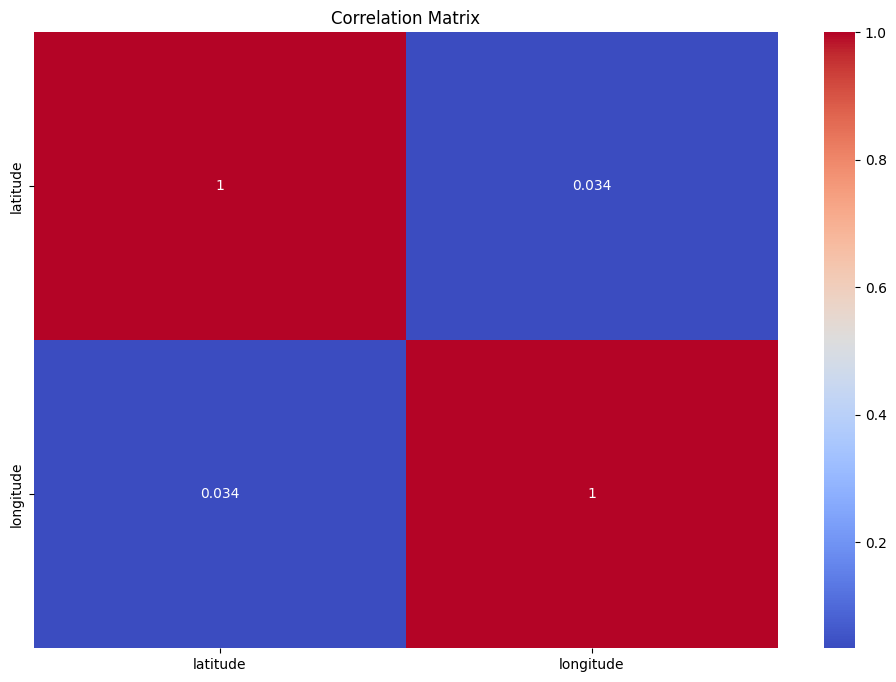

In [67]:
# Step 1: Identify non-numeric columns
non_numeric_cols = df.select_dtypes(include=['object']).columns
print(f"Non-numeric columns: {list(non_numeric_cols)}")

# Step 2: Exclude non-numeric columns from the correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Step 3: Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Step 4: Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


K-Means Clustering and Heatmaps for Hotspot Analysis: Their Importance in Analyzing Species Data
K-Means Clustering and heatmaps are powerful tools used in data analysis, particularly for identifying patterns and visualizing hotspots. In the context of analyzing species data in the City of Melbourne, these techniques can provide valuable insights into the distribution and concentration of species across different areas. Here’s how they can help in your task:

K-Means Clustering: Identifying Groupings and Patterns
K-Means Clustering is an unsupervised machine learning algorithm that groups data points into a specified number of clusters based on their similarity. It helps in identifying natural groupings within the data, which is particularly useful when analyzing spatial data such as species distributions.


Heatmaps: Visualizing Hotspots
Heatmaps are a visualization tool that represents data density or concentration using colors. In species analysis, heatmaps are particularly useful for identifying areas with high concentrations of species, also known as hotspots.

Combined Power of K-Means and Heatmaps
K-Means Clustering: This technique helps in identifying natural groupings and patterns in species data, simplifying the complexity of ecological data and aiding in hotspot detection.
Heatmaps: These visual tools highlight areas with high species concentrations, making it easier to identify and prioritize biodiversity hotspots for conservation.
By using K-Means clustering and heatmaps together, you can effectively analyze and visualize species distribution patterns, identify key areas for conservation, and communicate these findings to stakeholders. This combined approach enhances your ability to make data-driven decisions that support biodiversity preservation in the City of Melbourne.

latitude     0
longitude    0
dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


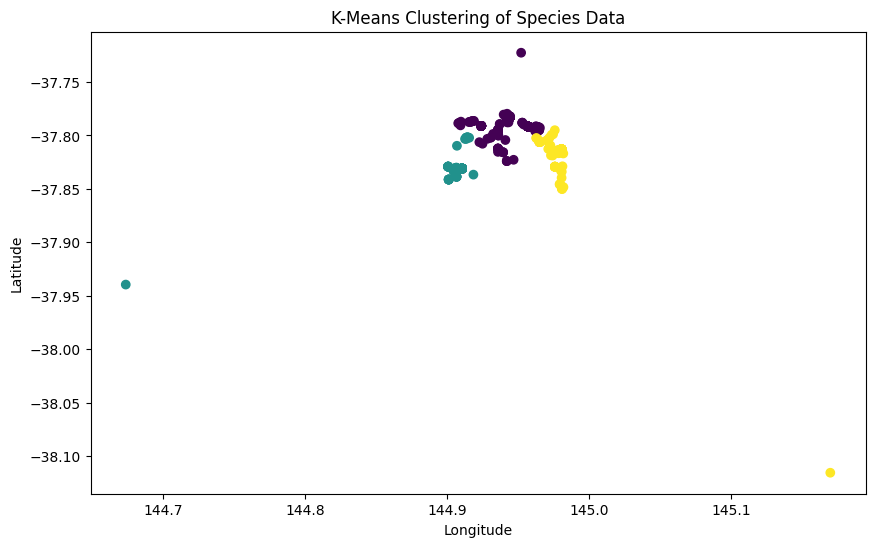

In [71]:
# Drop rows with NaN values in latitude or longitude
df = df.dropna(subset=['latitude', 'longitude'])


print(df[['latitude', 'longitude']].isnull().sum())  # This should print 0 for both columns



from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(df[['latitude', 'longitude']])

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], c=df['kmeans_cluster'], cmap='viridis')
plt.title('K-Means Clustering of Species Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [72]:
import folium
from folium.plugins import HeatMap

# Create a heatmap of species sightings
m = folium.Map(location=[-37.8136, 144.9631], zoom_start=12)
heat_data = [[row['latitude'], row['longitude']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(m)

# Save the map
m.save('species_heatmap.html')
m

0   2014-10-31
1   2014-11-15
2   2014-11-03
3   2014-11-05
4   2014-11-15
Name: sighting_date, dtype: datetime64[ns]


<ipython-input-77-ce35a850998c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['sighting_date'].dt.month


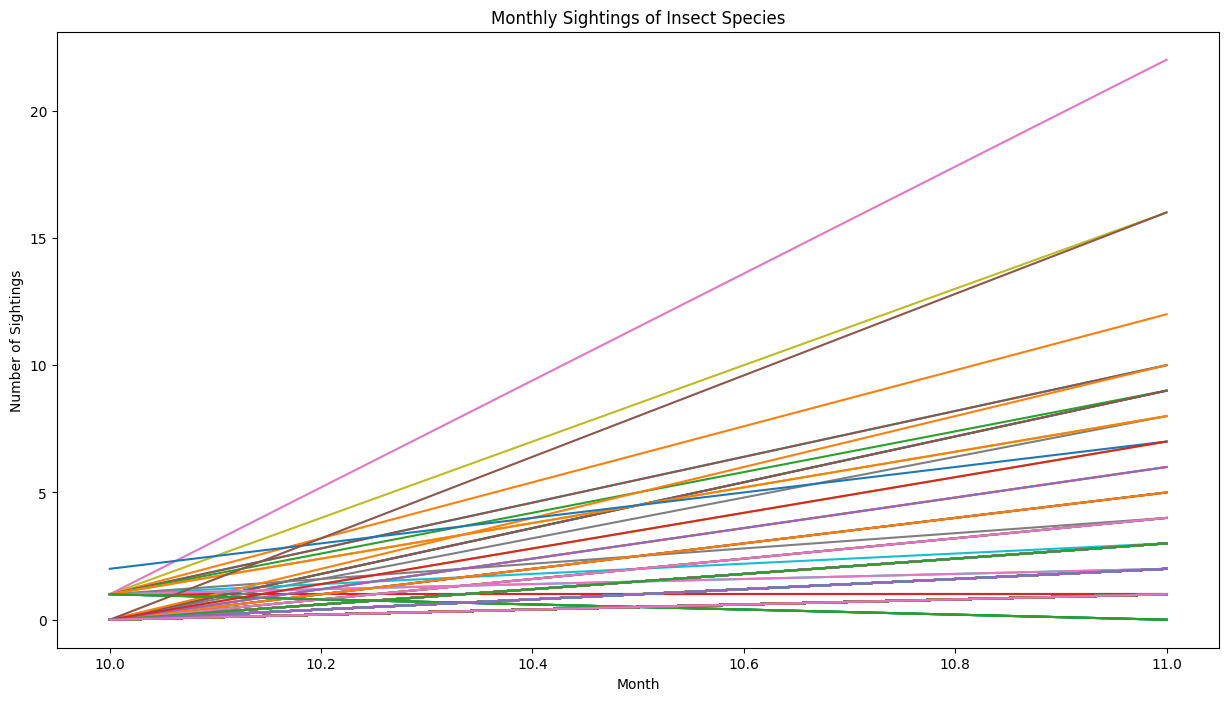

In [77]:
df['sighting_date'] = pd.to_datetime(df['sighting_date'], errors='coerce')
print(df['sighting_date'].head())  # Check the first few rows to ensure they are in datetime format

df = df.dropna(subset=['sighting_date'])

df['month'] = df['sighting_date'].dt.month
monthly_sightings = df.groupby(['month', 'species']).size().unstack().fillna(0)

monthly_sightings.plot(figsize=(15, 8), legend=False)
plt.title('Monthly Sightings of Insect Species')
plt.xlabel('Month')
plt.ylabel('Number of Sightings')
plt.show()


In [75]:
from itertools import combinations
from collections import Counter

co_occurrence = Counter()
for _, group in df.groupby('location'):
    species_list = group['species'].unique()
    co_occurrence.update(combinations(species_list, 2))

print("Most common species co-occurrences:")
for pair, count in co_occurrence.most_common(10):
    print(f"{pair}: {count} occurrences")


Most common species co-occurrences:
('novaehollandiae', 'chinensis'): 4 occurrences
('atra', 'neoxena'): 3 occurrences
('novaehollandiae', 'neoxena'): 3 occurrences
('mellori', 'haematodus'): 3 occurrences
('cyanoleuca', 'superciliosa'): 3 occurrences
('cyanoleuca', 'carunculata'): 3 occurrences
('cyanoleuca', 'chinensis'): 3 occurrences
('livia', 'novaehollandiae'): 3 occurrences
('livia', 'chinensis'): 3 occurrences
('tristis', 'carunculata'): 3 occurrences
